<a href="https://colab.research.google.com/github/cartman12/DS-Unit-2-Regression-1/blob/master/module1-making-forecasts/Mohamad%20Ali%20Nasser%20-%20Making%20Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files 

In [0]:
files.upload()

Saving pageviews-20150701-20190526.csv to pageviews-20150701-20190526.csv


{'pageviews-20150701-20190526.csv': b'Date,"Memorial Day"\n2015-07-01,1417\n2015-07-02,1312\n2015-07-03,1401\n2015-07-04,1768\n2015-07-05,1495\n2015-07-06,1377\n2015-07-07,1187\n2015-07-08,1245\n2015-07-09,1203\n2015-07-10,1137\n2015-07-11,997\n2015-07-12,912\n2015-07-13,1042\n2015-07-14,1127\n2015-07-15,1022\n2015-07-16,949\n2015-07-17,860\n2015-07-18,746\n2015-07-19,854\n2015-07-20,997\n2015-07-21,977\n2015-07-22,925\n2015-07-23,905\n2015-07-24,917\n2015-07-25,785\n2015-07-26,898\n2015-07-27,995\n2015-07-28,959\n2015-07-29,876\n2015-07-30,873\n2015-07-31,794\n2015-08-01,782\n2015-08-02,795\n2015-08-03,864\n2015-08-04,898\n2015-08-05,841\n2015-08-06,958\n2015-08-07,918\n2015-08-08,801\n2015-08-09,822\n2015-08-10,993\n2015-08-11,1020\n2015-08-12,938\n2015-08-13,1050\n2015-08-14,1070\n2015-08-15,1045\n2015-08-16,1296\n2015-08-17,1385\n2015-08-18,1382\n2015-08-19,1293\n2015-08-20,1240\n2015-08-21,1099\n2015-08-22,908\n2015-08-23,1063\n2015-08-24,1393\n2015-08-25,1388\n2015-08-26,1198\n20

In [0]:
df = pd.read_csv('pageviews-20150701-20190526.csv')

In [0]:
df.head()

,Date,Memorial Day
0,2015-07-01,1417.0
1,2015-07-02,1312.0
2,2015-07-03,1401.0
3,2015-07-04,1768.0
4,2015-07-05,1495.0


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [0]:
df.head()

,Memorial Day
Date,
2015-07-01,1417.0
2015-07-02,1312.0
2015-07-03,1401.0
2015-07-04,1768.0
2015-07-05,1495.0


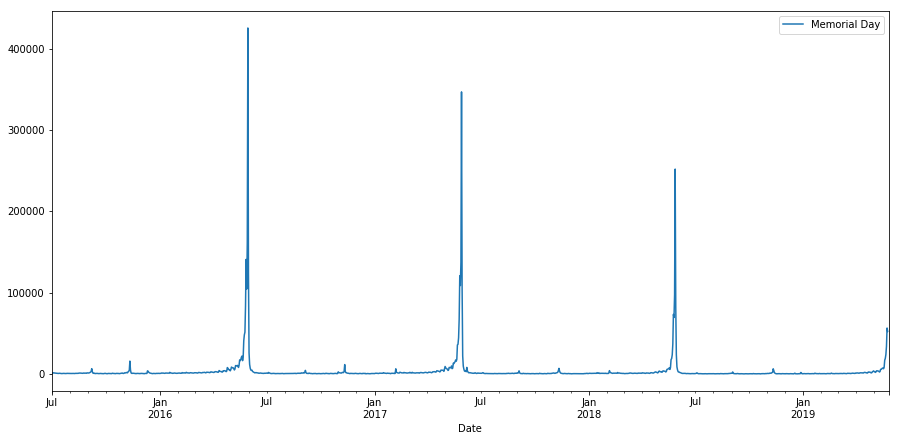

In [0]:
df.plot(figsize = (15,7))

In [0]:
df = df.reindex(pd.date_range(start = '2015-07-01', end = '2020-05-27'))

In [0]:
df2 = df.copy()

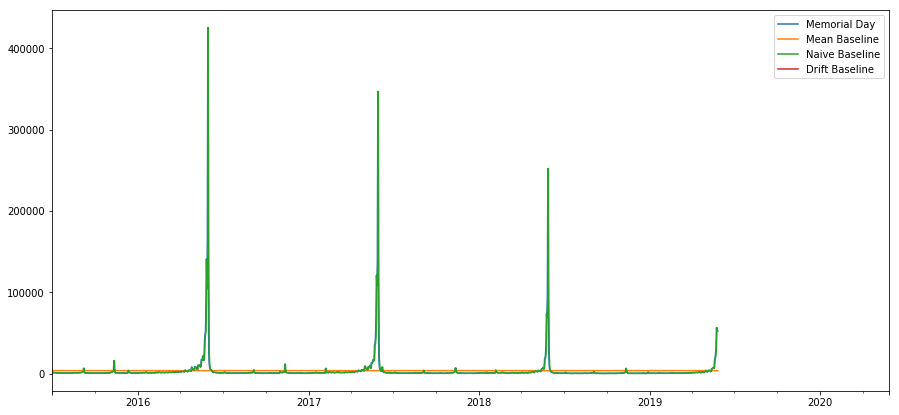

In [0]:
df.plot(figsize = (15,7))

In [0]:
df['Mean Baseline'] = df['Memorial Day'].mean()
df['Naive Baseline'] = df['Memorial Day'].shift(1).ffill()
df['Drift Baseline'] = np.nan
df.loc['2015-07-01','Drift Baseline'] = df.loc['2015-07-01', 'Memorial Day']
df.loc['2019-05-27','Drift Baseline'] = df.loc['2019-05-27', 'Memorial Day']
df['Drift Baseline'] = df['Drift Baseline'].interpolate(limit_area='inside')

In [0]:
df['Drift Baseline'].tail()

2020-05-23   NaN
2020-05-24   NaN
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
Freq: D, Name: Drift Baseline, dtype: float64

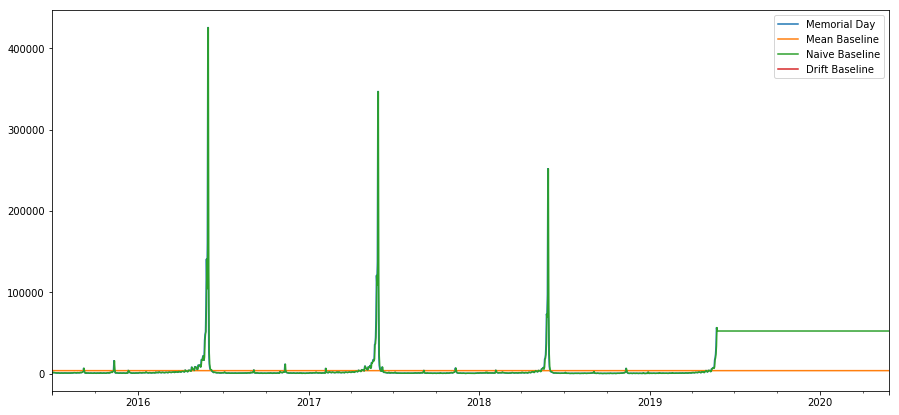

In [0]:
df.plot(figsize = (15,7))

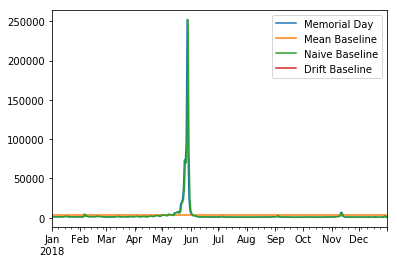

In [0]:
df['2018-01' : '2018-12'].plot()

In [0]:
# PROPHET

In [0]:
df2 = df2.reset_index().rename(columns={'index': 'ds', 'Memorial Day': 'y'})

In [0]:
df2.tail()

,ds,y
1788,2020-05-23,NaN
1789,2020-05-24,NaN
1790,2020-05-25,NaN
1791,2020-05-26,NaN
1792,2020-05-27,NaN


In [0]:
df.dtypes

Memorial Day    float64
dtype: object

In [0]:
df['ds'] = pd.to_datetime(df['ds'])

In [0]:
df['Date'] = pd.to_datetime(df['Date'])


In [0]:
df = df.rename({'Date' : 'ds', 'Memorial Day ' : 'y'})

In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods = 730)
future.tail()

,ds
2518,2022-05-23
2519,2022-05-24
2520,2022-05-25
2521,2022-05-26
2522,2022-05-27


In [0]:
forcast = m.predict(future)

In [0]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2518,2022-05-23,-1485.976051,26841.526012,69788.009662,-3206.728453,293.490464,49241.743788,49241.743788,49241.743788,3637.207380,3637.207380,3637.207380,45604.536407,45604.536407,45604.536407,0.0,0.0,0.0,47755.767736
2519,2022-05-24,-1489.309646,25282.379139,67160.507040,-3212.027649,292.821055,47729.980577,47729.980577,47729.980577,-22.368595,-22.368595,-22.368595,47752.349172,47752.349172,47752.349172,0.0,0.0,0.0,46240.670931
2520,2022-05-25,-1492.643242,25437.511886,67293.798379,-3217.326844,292.151645,48352.205259,48352.205259,48352.205259,-1101.261750,-1101.261750,-1101.261750,49453.467008,49453.467008,49453.467008,0.0,0.0,0.0,46859.562017
2521,2022-05-26,-1495.976837,27310.606936,68526.590061,-3222.612643,291.482236,49640.977799,49640.977799,49640.977799,-1032.769359,-1032.769359,-1032.769359,50673.747158,50673.747158,50673.747158,0.0,0.0,0.0,48145.000962
2522,2022-05-27,-1499.310432,29004.092347,69841.877592,-3227.897853,290.812826,51080.850743,51080.850743,51080.850743,-306.899303,-306.899303,-306.899303,51387.750046,51387.750046,51387.750046,0.0,0.0,0.0,49581.540311


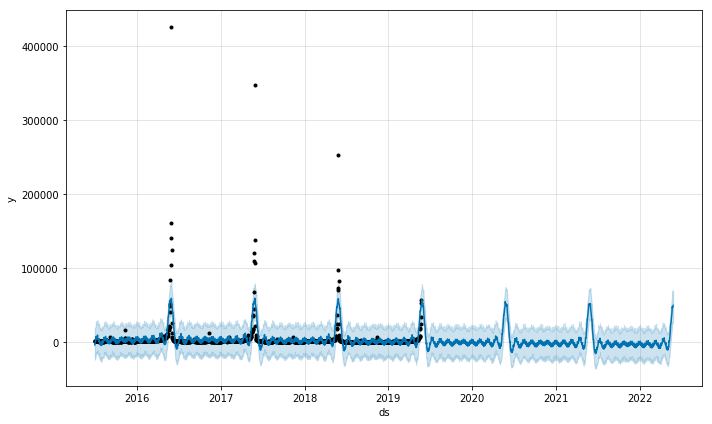

In [0]:
fig = m.plot(forcast)


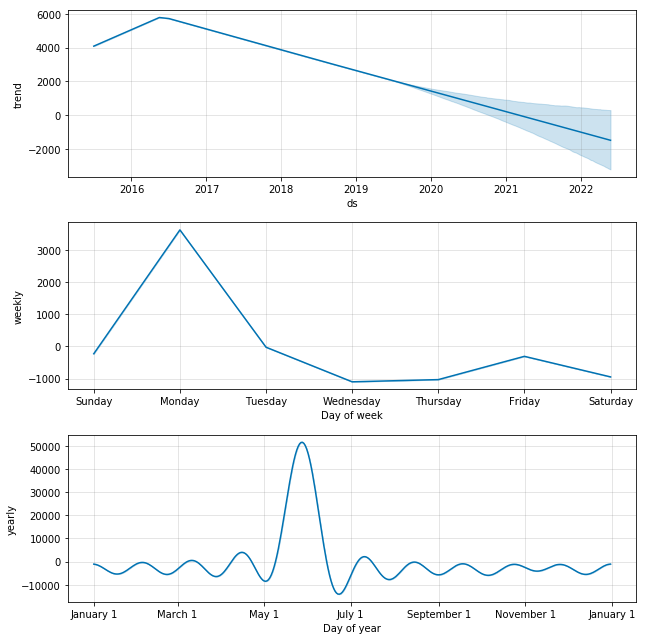

In [0]:
fig1 = m.plot_components(forcast)